# Exercise 4 - Grover's algorithm

## Exercise 4.1 - Pauli $Z$ magic
The Pauli $Z$ gate is defined by the matrix $Z=\begin{bmatrix}1 & 0 \\ 0 & -1\end{bmatrix}$ associated to the computational basis.
1. Discuss, how $Z$ acts on quantum states $\alpha\lvert 0\rangle+\beta\lvert 1\rangle$.
2. Consider a $2$-qubit system. Describe, how the controlled $Z$ gate $CZ$ acts on the computational basis states 
$\lvert 00\rangle,\lvert 01\rangle,\lvert 10\rangle,\lvert 11\rangle$. How do the effects change, if control qubit and target qubit are interchanged?
3. Consider a $4$-qubit system. Let $CCCZ$ be a multi-controlled $Z$ gate ($3$ control qubits, $1$ target qubit). Explain the behavior of the quantum operator $D:=H^{\otimes 4}X^{\otimes 4}\,CCCZ\,X^{\otimes 4}H^{\otimes 4}$. How is $D$ connected to Grover's algorithm?   
__Hint__: Try to understand $D$ from inside. What does $CCCZ$ do? What does $X^{\otimes 4}\,CCCZ\,X^{\otimes 4}$ do? What does the whole operator do?
4. Implement a quantum circuit to apply $D$ to the uniform superposition state
$\lvert\char43\char43\char43\char43\rangle=\frac{1}{4}\sum\limits_{i=0}^{15}\lvert i\rangle$. What can you observe?

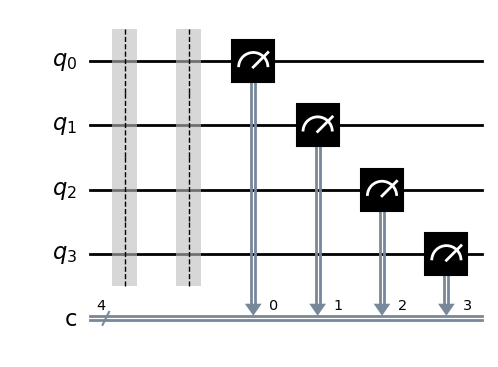

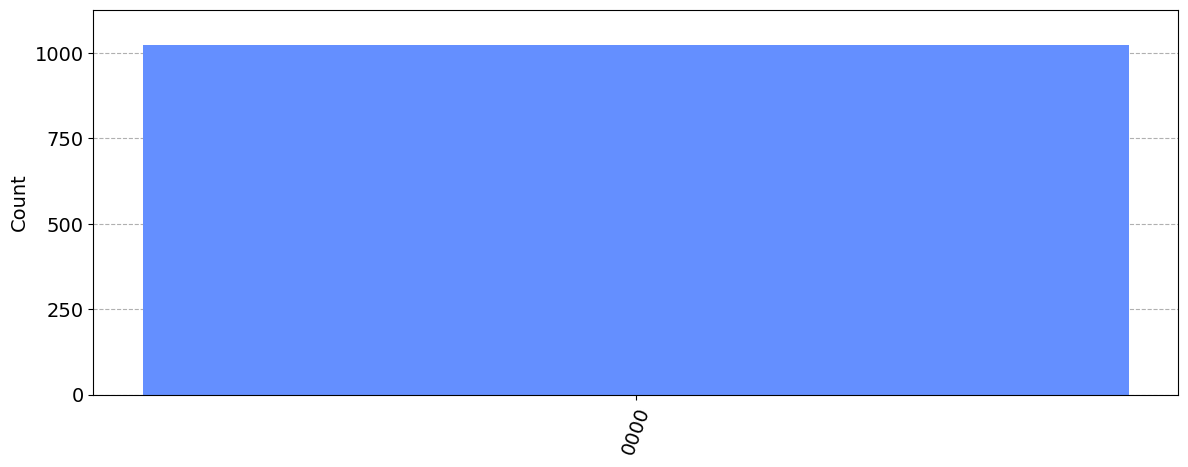

In [1]:
from qiskit import QuantumCircuit, execute
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import ZGate

def append_multi_cz(grover, register):
    multi_cz = ZGate().control(len(register)-1)
    grover.append(multi_cz, register)

def init(grover, register):
    # put your code here
    grover.barrier()

def diffuser(grover, register):
    # put your code here
    grover.barrier()

grover = QuantumCircuit(4,4)
init(grover, [0,1,2,3])
diffuser(grover, [0,1,2,3])

grover.measure([0,1,2,3], [0,1,2,3])
display(grover.draw(output='mpl', fold=-1))

job = execute(grover, backend=AerSimulator(), shots=1024)
result = job.result()
counts = result.get_counts()
display(plot_histogram(counts, bar_labels=False, figsize=(14,5)))

## Exercise 4.2 - Phase oracle
Consider a $4$-qubit system. For $x\in\{0,1,\ldots,15\}$ let $U$ be the phase oracle that marks exactly the desired classical states $4$ and $10$, i.e. 
$$U\lvert x\rangle=\begin{cases}
-\lvert x\rangle, & x\in\{4,10\},\\
\lvert x\rangle, & \text{otherwise}.
\end{cases}$$
1. Use $CCCZ$ to construct $U$.
2. Implement a quantum circuit to apply $U$ to the uniform superposition state
$\lvert\char43\char43\char43\char43\rangle=\frac{1}{4}\sum\limits_{i=0}^{15}\lvert i\rangle$. What can you observe?

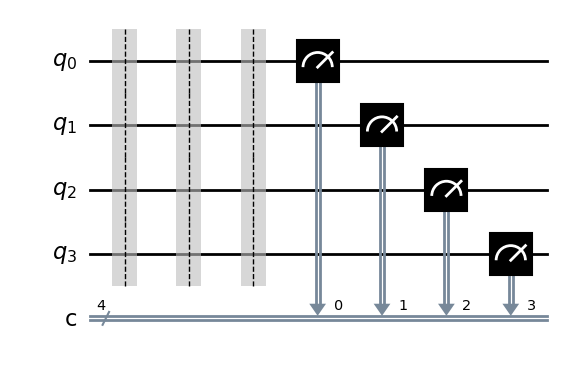

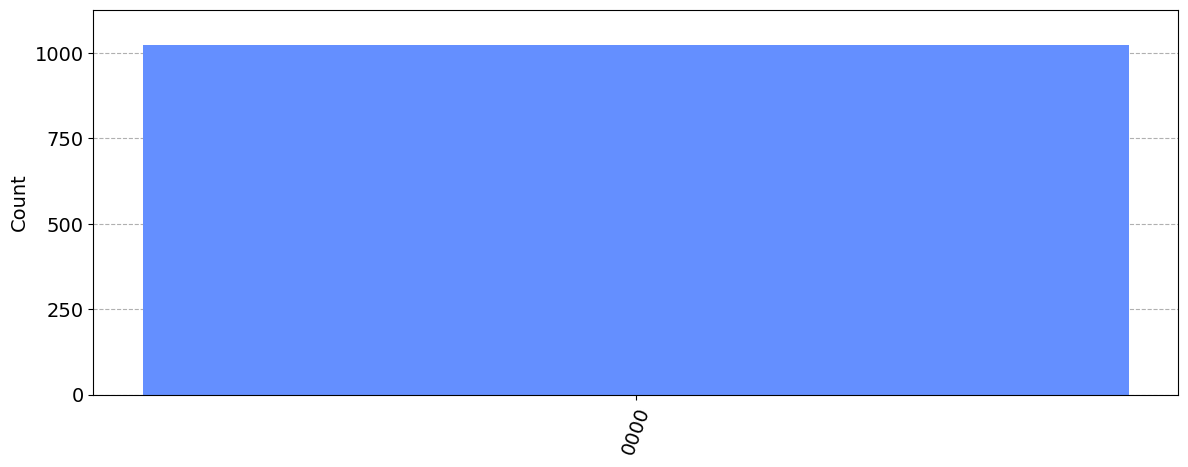

In [2]:
def oracle(grover, register, xs):
    def control_flips(x):
        bit_string = format(x, 'b').zfill(len(register))
        return [qubit for i,qubit in enumerate(register) if bit_string[-1-i] == '0']    
    for x in xs:
        flips = control_flips(x)
        # put your code here
        grover.barrier()

grover = QuantumCircuit(4,4)
init(grover, [0,1,2,3])
oracle(grover, [0,1,2,3], [4,10])

grover.measure([0,1,2,3], [0,1,2,3])
display(grover.draw(output='mpl', fold=-1))

job = execute(grover, backend=AerSimulator(), shots=1024)
result = job.result()
counts = result.get_counts()
display(plot_histogram(counts, bar_labels=False, figsize=(14,5)))

## Exercise 4.3 - Grover's algorithm
Use exercises 4.1 and 4.2 to implement Grover's algorithm. Find the classical states $4$ and $10$ in a $4$-qubit system.

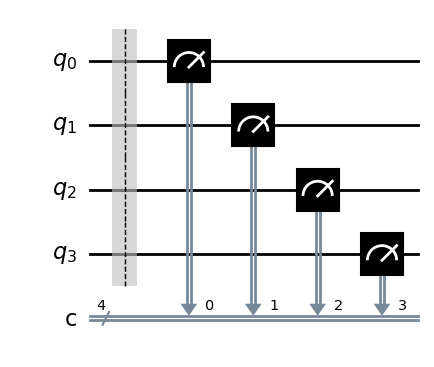

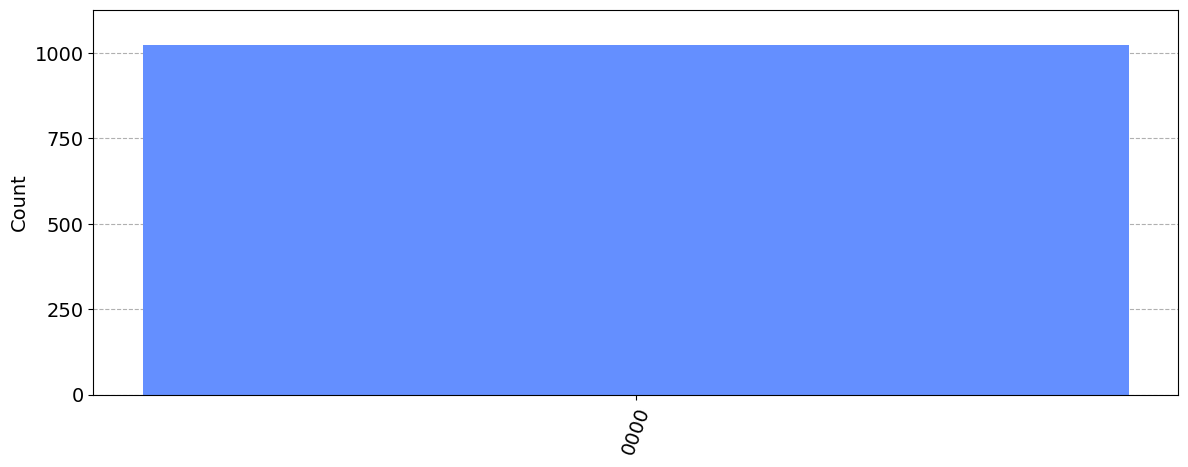

In [3]:
iterations = 2

grover = QuantumCircuit(4,4)
init(grover, [0,1,2,3])
for _ in range(iterations):
    # put your code here
    pass

grover.measure([0,1,2,3], [0,1,2,3])
display(grover.draw(output='mpl', fold=-1))

job = execute(grover, backend=AerSimulator(), shots=1024)
result = job.result()
counts = result.get_counts()
display(plot_histogram(counts, bar_labels=False, figsize=(14,5)))